In [1]:
import squarify
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

## Carregando e Explorando os Dados

In [2]:
# Carrega o dataset
df = pd.read_csv("C:/Users\Andre/Desktop/visualizar aula-dados/.venv/dataset.csv")


In [3]:
# Shape
df.shape

(116581, 53)

In [4]:
# Amostra de dados
df.head()

,order_id,order_id3,customer_id3,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,seller_city,seller_state,product_category_name_english,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
3,ON40291,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,8,1,18,Tue,Aug
4,ON74313,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,...,Maua,SP,housewares,0.0,2017,8,2,18,Wed,Aug


In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116581 non-null  object 
 1   order_id3                      116581 non-null  object 
 2   customer_id3                   116581 non-null  object 
 3   order_status                   116581 non-null  object 
 4   order_purchase_timestamp       116581 non-null  object 
 5   order_approved_at              116581 non-null  object 
 6   order_delivered_carrier_date   116581 non-null  object 
 7   order_delivered_customer_date  116581 non-null  object 
 8   order_estimated_delivery_date  116581 non-null  object 
 9   order_item_id                  116581 non-null  float64
 10  product_id3                    116581 non-null  object 
 11  seller_id3                     116581 non-null  object 
 12  shipping_limit_date           

## Engenharia de Atributos com as Colunas do Tipo Data

A data de compra é importante para nossa análise. Vamos extrair essa informação da coluna order_purchase_timestamp e então criar duas novas colunas.

In [6]:
# Converte 'order_purchase_timestamp' para datetime sem especificar o formato
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [7]:
# Extrai apenas a data do timestamp e cria uma nova coluna chamada order_purchase_date
df['order_purchase_date'] = df['order_purchase_timestamp'].dt.date

In [8]:
# Vamos criar a coluna InvoiceDate
df['InvoiceDate'] = df.order_purchase_date.apply(lambda x : datetime.strftime(x, '%Y-%m-%d'))
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
df.head()

,order_id,order_id3,customer_id3,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,product_category_name_english,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,order_purchase_date,InvoiceDate
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,housewares,1.0,2017,10,0,10,Mon,Oct,2017-10-02,2017-10-02
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,housewares,1.0,2017,10,0,10,Mon,Oct,2017-10-02,2017-10-02
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,housewares,1.0,2017,10,0,10,Mon,Oct,2017-10-02,2017-10-02
3,ON40291,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,...,housewares,1.0,2017,8,1,18,Tue,Aug,2017-08-15,2017-08-15
4,ON74313,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,...,housewares,0.0,2017,8,2,18,Wed,Aug,2017-08-02,2017-08-02


In [10]:
# Resumo do dataset
print('{:,} Linhas; {:,} Colunas'.format(df.shape[0], df.shape[1]))
print('{:,} Transações não tem customer id'.format(df[df.customer_unique_id.isnull()].shape[0]))
print('Datas das Transações de {} a {}'.format(df['InvoiceDate'].min(), df['InvoiceDate'].max()))

116,581 Linhas; 55 Colunas
0 Transações não tem customer id
Datas das Transações de 2016-09-04 00:00:00 a 2018-09-03 00:00:00


## Agregação dos Dados Para Criação dos Parâmetros R, F e M

In [11]:
# Define a data mais recente
data_mais_recente = df['InvoiceDate'].max() + timedelta(days = 1)
data_mais_recente

Timestamp('2018-09-04 00:00:00')

**dfvoiceDate'].max()**: Esta parte do código está acessando a coluna 'InvoiceDate' em um DataFrame chamado df e encontrando a data máxima, que é a data da fatura mais recente no conjunto de dados.

**timedelta(days = 1)**: Isso cria um intervalo de tempo de um dia. A função timedelta faz parte do módulo datetime em Python e é usada para representar uma duração de tempo. Neste caso, está sendo usada para adicionar um dia à data da fatura mais recente.

O resultado é a data da fatura mais recente mais um dia.

O motivo para adicionar um dia à data da fatura mais recente é criar um ponto de referência para calcular a recência. Na análise RFM, a recência é calculada como o número de dias desde a última compra de um cliente. Ao definir a data_mais_recente para um dia após a compra mais recente no conjunto de dados, você pode calcular a recência simplesmente subtraindo a data da fatura da data_mais_recente para cada cliente, o que é feito abaixo:

In [12]:
# Agrupando por CustomerID
df_agg = df.groupby(['customer_unique_id']).agg({'InvoiceDate': 
                                                 lambda x: (data_mais_recente - x.max()).days,
                                                         'order_id': 'count',
                                                         'payment_value': 'sum'})

In [13]:
# Renomeia as colunas
df_agg.rename(columns = {'InvoiceDate': 'Recency', 
                             'order_id': 'Frequency', 
                             'payment_value': 'Monetary'}, 
                  inplace = True)

In [14]:
# Visualiza
df_agg.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
C00001,73,1,121.82
C00002,66,1,155.76
C00003,337,1,181.55
C00004,193,1,90.78
C00005,283,1,266.89


In [15]:
# Visualiza
df_agg.sample(10)

,Recency,Frequency,Monetary
customer_unique_id,,,
C35914,283,1,88.72
C05257,29,1,129.53
C91086,340,1,193.98
C47212,340,1,77.57
C93505,406,1,18.59
C81747,350,1,186.46
C40267,355,1,188.74
C93851,123,1,356.89
C81659,31,1,128.78


In [16]:
# Verifica se gerou valores ausentes
df_agg.isna().any()

Recency      False
Frequency    False
Monetary     False
dtype: bool

In [17]:
# Resumo estatístico
df_agg['Recency'].describe()

count    94087.000000
mean       243.803575
std        153.156983
min          1.000000
25%        120.000000
50%        224.000000
75%        353.000000
max        730.000000
Name: Recency, dtype: float64

In [18]:
# Vamos vericar a "frequência da frequência de compra"
df_agg['Frequency'].value_counts()

Frequency
1     79915
2     10323
3      2003
4       956
5       337
6       300
7        73
8        45
12       25
9        25
10       25
11       18
14        8
15        7
24        7
20        4
13        4
21        3
18        1
16        1
29        1
19        1
22        1
75        1
26        1
38        1
35        1
Name: count, dtype: int64

In [19]:
# Resumo estatístico
df_agg['Monetary'].describe()

count     94087.000000
mean        214.249054
std         647.368039
min           9.590000
25%          64.000000
50%         113.150000
75%         203.770000
max      109312.640000
Name: Monetary, dtype: float64

## Definição dos Recursos RFM Através de Análise Estatística

Temos registros de clientes agrupados por tempo para retorno de suas compras, a frequência por sua quantidade e o valor monetário das compras. Agora podemos usar o método .qcut() para atribuir o percentil relativo aos recursos RFM. Mas, por que faremos isso? 

In [20]:
# Amostra
df_agg.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
C00001,73,1,121.82
C00002,66,1,155.76
C00003,337,1,181.55
C00004,193,1,90.78
C00005,283,1,266.89


Considere os quartis dos valores monetários:
    
Estes quartis representam os valores que dividem a distribuição dos dados em quatro partes iguais. Eles são uma medida de dispersão que dá uma ideia da distribuição dos dados. Aqui está como você pode interpretá-los:

**25% (Primeiro Quartil)**: 25% dos dados são menores ou iguais a 64.000. Isso significa que um quarto dos valores na distribuição é menor ou igual a 64.000.

**50% (Segundo Quartil ou Mediana)**: 50% dos dados são menores ou iguais a 113.150. A mediana é o valor do meio da distribuição, de modo que metade dos valores é menor ou igual a 113.150 e a outra metade é maior.

**75% (Terceiro Quartil)**: 75% dos dados são menores ou iguais a 203.770. Isso indica que três quartos dos valores na distribuição são menores ou iguais a 203.770.

Os quartis são úteis para entender a distribuição dos dados, identificar valores atípicos e comparar diferentes conjuntos de dados. 

Usaremos os quartis para dividir os clientes estatisticamente nos parâmetros R, F e M.

In [21]:
# Criando labels para Recency 
r_labels = range(4, 0, -1)

A função range em Python gera uma sequência de números. O uso de range(4, 0, -1) cria uma sequência que começa em 4, termina antes de 0 e decrementa em 1 a cada passo. Portanto, a sequência gerada será: 4,3,2,1

Note que o número 0 não está incluído na sequência, pois o ponto final especificado em range é exclusivo.

In [22]:
# Atribuindo esses rótulos a 4 grupos de percentis
r_groups = pd.qcut(df_agg['Recency'], q = 4, labels = r_labels)

**q = 4**: Indica que a série de dados será dividida em 4 quantis, ou seja, em quartis. Isso significa que a série será dividida em quatro partes iguais com base nos valores de recência.

Os quartis serão rotulados com os rótulos fornecidos na lista r_labels. Por exemplo, se r_labels = [4, 3, 2, 1], o quartil mais baixo (os 25% dos dados com a menor recência) será rotulado como '4', o próximo quartil como '3', e assim por diante.

In [23]:
r_groups.value_counts()

Recency
4    23766
2    23563
1    23440
3    23318
Name: count, dtype: int64

In [24]:
# Cria a coluna R no dataframe
df_agg = df_agg.assign(R = r_groups.values)

In [25]:
df_agg.head()

,Recency,Frequency,Monetary,R
customer_unique_id,,,,
C00001,73,1,121.82,4
C00002,66,1,155.76,4
C00003,337,1,181.55,2
C00004,193,1,90.78,3
C00005,283,1,266.89,2


In [26]:
# Amostra
df_agg.sample(10)

,Recency,Frequency,Monetary,R
customer_unique_id,,,,
C67103,77,2,33.22,4
C11724,39,2,479.00,4
C88793,285,1,90.66,2
C83638,85,1,73.59,4
C19421,341,1,172.96,2
C56962,32,1,63.65,4
C82595,51,1,178.24,4
C00549,390,1,31.00,1
C26326,83,1,124.14,4


> Para a frequência vamos trabalhar somente com 2 grupos: Grupo dos clientes que compraram apenas uma vez e grupo dos clientes que compraram mais de uma vez.

In [27]:
# Resumo estatístico
df_agg['Frequency'].describe()

count    94087.000000
mean         1.239077
std          0.850594
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         75.000000
Name: Frequency, dtype: float64

In [28]:
# Criando labels para Frequency
f_labels = range(1, 3)

In [29]:
f_labels

range(1, 3)

In [30]:
# Função
def pct_rank_qcut(series, n):
    
    # Cria uma série de valores limite para os quantis, dividindo o intervalo [0, 1] em n partes iguais
    edges = pd.Series([float(i) / n for i in range(n + 1)])
    
    # Define uma função que encontra o índice do primeiro valor na série de limites que é maior ou igual a x
    f = lambda x: (edges >= x).values.argmax()
    
    # Classifica a série de entrada como uma porcentagem (de 0 a 1)
    # e então aplica a função f para mapear cada valor para seu respectivo quantil
    return series.rank(pct = 1).apply(f)

In [31]:
# Atribuindo esses rótulos a 2 grupos de percentis 
f_groups = pct_rank_qcut(df_agg['Frequency'], 2)

In [32]:
f_groups.value_counts()

Frequency
1    79915
2    14172
Name: count, dtype: int64

In [33]:
# Cria a coluna F no dataframe
df_agg = df_agg.assign(F = f_groups.values)

In [34]:
# Amostra
df_agg.sample(10)

,Recency,Frequency,Monetary,R,F
customer_unique_id,,,,,
C49779,193,1,246.37,3,1
C69411,179,3,269.64,3,2
C95606,146,1,118.66,3,1
C50436,536,1,74.08,1,1
C12520,276,1,100.25,2,1
C53929,393,2,293.36,1,2
C23698,81,1,52.93,4,1
C47993,41,1,37.36,4,1
C21110,134,1,82.05,3,1


In [35]:
# Criando labels para Monetary
m_labels = range(1, 5)

In [36]:
# Atribuindo esses rótulos a 4 grupos de percentis
m_groups = pd.qcut(df_agg['Monetary'], q = 4, labels = m_labels)

In [37]:
m_groups.value_counts()

Monetary
1    23569
4    23521
3    23503
2    23494
Name: count, dtype: int64

In [38]:
# Cria a nova coluna M
df_agg = df_agg.assign(M = m_groups.values)

In [39]:
df_agg.head()

,Recency,Frequency,Monetary,R,F,M
customer_unique_id,,,,,,
C00001,73,1,121.82,4,1,3
C00002,66,1,155.76,4,1,3
C00003,337,1,181.55,2,1,3
C00004,193,1,90.78,3,1,2
C00005,283,1,266.89,2,1,4


In [40]:
# Observe os tipos de dados
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94087 entries, C00001 to C96999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    94087 non-null  int64   
 1   Frequency  94087 non-null  int64   
 2   Monetary   94087 non-null  float64 
 3   R          94087 non-null  category
 4   F          94087 non-null  int64   
 5   M          94087 non-null  category
dtypes: category(2), float64(1), int64(3)
memory usage: 3.8+ MB


## Processamento dos Dados e Label Encoding

R e F foram criados como tipo category. Vamos ajustar isso.

In [41]:
# Cria o codificador
d_le = LabelEncoder()

In [42]:
# Transformação de categoria para representação numérica
df_agg['R'] = d_le.fit_transform(df_agg['R']) + 1
df_agg['M'] = d_le.fit_transform(df_agg['M']) + 1

In [43]:
# Info
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94087 entries, C00001 to C96999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    94087 non-null  int64  
 1   Frequency  94087 non-null  int64  
 2   Monetary   94087 non-null  float64
 3   R          94087 non-null  int64  
 4   F          94087 non-null  int64  
 5   M          94087 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 7.0+ MB


In [44]:
# Amostra
df_agg.head()

,Recency,Frequency,Monetary,R,F,M
customer_unique_id,,,,,,
C00001,73,1,121.82,4,1,3
C00002,66,1,155.76,4,1,3
C00003,337,1,181.55,2,1,3
C00004,193,1,90.78,3,1,2
C00005,283,1,266.89,2,1,4


Com essas 3 pontuações, R, F e M, podemos criar os scores e segmentos RFM.

## Criação dos Segmentos RFM

In [45]:
# Cria o RFM Score
df_agg['Score_RFM'] = df_agg[['R','F','M']].sum(axis = 1)

In [46]:
df_agg.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM
customer_unique_id,,,,,,,
C00001,73,1,121.82,4,1,3,8
C00002,66,1,155.76,4,1,3,8
C00003,337,1,181.55,2,1,3,6
C00004,193,1,90.78,3,1,2,6
C00005,283,1,266.89,2,1,4,7


**ATENÇÃO: A OPERAÇÃO ABAIXO É CONCATENAÇÃO E NÃO SOMA!**

In [47]:
# Concatena valores de RFM para criar segmentos de RFM
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

In [48]:
# Aplica a função
df_agg['Segmento_RFM'] = df_agg.apply(join_rfm, axis = 1)

In [49]:
# Visualiza
df_agg.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segmento_RFM
customer_unique_id,,,,,,,,
C00001,73,1,121.82,4,1,3,8,4.01.03.0
C00002,66,1,155.76,4,1,3,8,4.01.03.0
C00003,337,1,181.55,2,1,3,6,2.01.03.0
C00004,193,1,90.78,3,1,2,6,3.01.02.0
C00005,283,1,266.89,2,1,4,7,2.01.04.0


In [50]:
# Aplica a função
df_agg['Segmento_RFM'] = df_agg.apply(join_rfm, axis = 1)

In [51]:
# Visualiza
df_agg.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segmento_RFM
customer_unique_id,,,,,,,,
C00001,73,1,121.82,4,1,3,8,413
C00002,66,1,155.76,4,1,3,8,413
C00003,337,1,181.55,2,1,3,6,213
C00004,193,1,90.78,3,1,2,6,312
C00005,283,1,266.89,2,1,4,7,214


In [52]:
# Contamos o número de segmentos únicos
rfm_count_unique = df_agg.groupby('Segmento_RFM')['Segmento_RFM'].nunique()

In [53]:
print(rfm_count_unique.sum())

32


In [54]:
# Criamos uma cópia do dataframe
rfm = df_agg

In [55]:
# Amostra
rfm.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segmento_RFM
customer_unique_id,,,,,,,,
C00001,73,1,121.82,4,1,3,8,413
C00002,66,1,155.76,4,1,3,8,413
C00003,337,1,181.55,2,1,3,6,213
C00004,193,1,90.78,3,1,2,6,312
C00005,283,1,266.89,2,1,4,7,214


In [56]:
# Info
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94087 entries, C00001 to C96999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recency       94087 non-null  int64  
 1   Frequency     94087 non-null  int64  
 2   Monetary      94087 non-null  float64
 3   R             94087 non-null  int64  
 4   F             94087 non-null  int64  
 5   M             94087 non-null  int64  
 6   Score_RFM     94087 non-null  int64  
 7   Segmento_RFM  94087 non-null  object 
dtypes: float64(1), int64(6), object(1)
memory usage: 8.5+ MB


In [57]:
# Ajusta o tipo de dado
rfm['Segmento_RFM'] = rfm['Segmento_RFM'].astype(str).astype(int)

In [58]:
# Info
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94087 entries, C00001 to C96999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recency       94087 non-null  int64  
 1   Frequency     94087 non-null  int64  
 2   Monetary      94087 non-null  float64
 3   R             94087 non-null  int64  
 4   F             94087 non-null  int64  
 5   M             94087 non-null  int64  
 6   Score_RFM     94087 non-null  int64  
 7   Segmento_RFM  94087 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 8.5+ MB


In [59]:
# Describe
rfm.describe()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segmento_RFM
count,94087.000000,94087.000000,94087.000000,94087.000000,94087.000000,94087.000000,94087.000000,94087.000000
mean,243.803575,1.239077,214.249054,2.503895,1.150627,2.499283,6.153804,264.395081
std,153.156983,0.850594,647.368039,1.119577,0.357686,1.118482,1.715630,112.037091
min,1.000000,1.000000,9.590000,1.000000,1.000000,1.000000,3.000000,111.000000
25%,120.000000,1.000000,64.000000,2.000000,1.000000,1.000000,5.000000,211.000000
50%,224.000000,1.000000,113.150000,3.000000,1.000000,2.000000,6.000000,311.000000
75%,353.000000,1.000000,203.770000,4.000000,1.000000,3.000000,7.000000,411.000000
max,730.000000,75.000000,109312.640000,4.000000,2.000000,4.000000,10.000000,424.000000


## Segmentação de Clientes Usando Análise RFM

In [60]:
# Função para criar os níveis RFM
def rfm_level(df):
    
    if (df['Segmento_RFM'] >= 424 | (df['Score_RFM'] >= 9)) :
        return 'Clientes VIP'
    
    elif ((df['Score_RFM'] >= 8) & (df['M'] == 4)):
        return 'Clientes Leais Que Compram com Frequência'
    
    elif ((df['Score_RFM'] >= 6) & (df['F'] >= 2)):
        return 'Clientes Leais'
    
    elif ((df['Score_RFM'] <= 4) & (df['R'] == 1)):
        return 'Clientes Quase Perdidos'
    
    elif ((df['Segmento_RFM'] >= 221) | (df['Score_RFM'] >= 6)):
        return 'Potenciais Clientes Leais'
    
    elif ((df['Segmento_RFM'] >= 121) & (df['R'] == 1) | (df['Score_RFM'] == 5)):
        return 'Clientes Que Precisam de Atenção'
    
    else:
        return 'Clientes Perdidos'

In [61]:
# Função para as ações RFM
def rfm_action(df):
    
    if (df['Segmento_RFM'] >= 424 | (df['Score_RFM'] >= 9)) :
        return 'Incentivos não relacionados a preços; Oferecer edição limitada e programas de fidelidade'
    
    elif ((df['Score_RFM'] >= 8) & (df['M'] == 4)):
        return 'Oferecer itens mais caros (Upsell)'
    
    elif ((df['Score_RFM'] >= 6) & (df['F'] >= 2)):
        return 'Oferecer programas de fidelidade e venda cruzada (Cross-Sell)'
    
    elif ((df['Score_RFM'] <= 4) & (df['R'] == 1)):
        return 'Oferecer Incentivos de preços agressivos'
    
    elif ((df['Segmento_RFM'] >= 221) | (df['Score_RFM'] >= 6)):
        return 'Recomendações de venda cruzada e cupons de desconto'
    
    elif (((df['Segmento_RFM'] >= 121) & (df['R'] == 1)) | (df['Score_RFM'] == 5)):
        return 'Incentivos de preço e oferta por tempo limitado'
    
    else:
        return 'Não gaste muito tentando readquirir esse cliente'

In [62]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segmento_RFM
customer_unique_id,,,,,,,,
C00001,73,1,121.82,4,1,3,8,413
C00002,66,1,155.76,4,1,3,8,413
C00003,337,1,181.55,2,1,3,6,213
C00004,193,1,90.78,3,1,2,6,312
C00005,283,1,266.89,2,1,4,7,214


In [63]:
# Aplica a função e cria nova variável 'Segmento de Cliente'
rfm['Segmento de Cliente'] = rfm.apply(rfm_level, axis = 1)

In [64]:
# Aplica a função e cria uma nova variável 'Marketing Action'
rfm['Marketing Action'] = rfm.apply(rfm_action, axis = 1)

In [65]:
# Total de registros por segmento de cliente
rfm['Segmento de Cliente'].value_counts()

Segmento de Cliente
Potenciais Clientes Leais                    45421
Clientes Leais Que Compram com Frequência    14249
Clientes Quase Perdidos                      11595
Clientes Que Precisam de Atenção             11043
Clientes Leais                                6141
Clientes Perdidos                             5638
Name: count, dtype: int64

In [66]:
# Salva os dados em disco
rfm.to_csv("rfm.csv")

In [67]:
# Calcula os valores médios para cada segmento e o tamanho do retorno de cada segmento
rfm_level_agg = rfm.groupby(['Segmento de Cliente']).agg({'Recency': 'mean',
                                                          'Frequency' : 'mean',
                                                          'Monetary': ['mean', 'count'],
                                                          'Marketing Action' : 'unique'}).round(1)

In [68]:
# Imprime
rfm_level_agg

Recency Frequency Monetary         \
                                             mean      mean     mean  count   
Segmento de Cliente                                                           
Clientes Leais                              305.2       2.4    356.9   6141   
Clientes Leais Que Compram com Frequência   146.1       1.9    619.3  14249   
Clientes Perdidos                           281.9       1.0     44.2   5638   
Clientes Quase Perdidos                     457.3       1.0     64.2  11595   
Clientes Que Precisam de Atenção            368.5       1.0    114.9  11043   
Potenciais Clientes Leais                   176.6       1.0    151.5  45421   

                                                                            Marketing Action  
                                                                                      unique  
Segmento de Cliente                                                                           
Clientes Leais                             [Oferecer programas de fidelidade e venda cruz...  
Clientes Leais Que Compram com Frequência               [Oferecer itens mais caros (Upsell)]  
Clientes Perdidos                          [Não gaste muito tentando readquirir esse clie...  
Clientes Quase Perdidos                           [Oferecer Incentivos de preços agressivos]  
Clientes Que Precisam de Atenção           [Incentivos de preço e oferta por tempo limitado]  
Potenciais Clientes Leais                  [Recomendações de venda cruzada e cupons de de...

In [69]:
# Ajustando o dataframe e fazendo o reset do índice
rfm_level_ag = pd.DataFrame(rfm_level_agg)
rfm_level_ag = rfm_level_ag.reset_index()
rfm_level_ag

Segmento de Cliente Recency Frequency Monetary  \
                                                mean      mean     mean   
0                             Clientes Leais   305.2       2.4    356.9   
1  Clientes Leais Que Compram com Frequência   146.1       1.9    619.3   
2                          Clientes Perdidos   281.9       1.0     44.2   
3                    Clientes Quase Perdidos   457.3       1.0     64.2   
4           Clientes Que Precisam de Atenção   368.5       1.0    114.9   
5                  Potenciais Clientes Leais   176.6       1.0    151.5   

                                           Marketing Action  
   count                                             unique  
0   6141  [Oferecer programas de fidelidade e venda cruz...  
1  14249               [Oferecer itens mais caros (Upsell)]  
2   5638  [Não gaste muito tentando readquirir esse clie...  
3  11595         [Oferecer Incentivos de preços agressivos]  
4  11043  [Incentivos de preço e oferta por tempo limitado]  
5  45421  [Recomendações de venda cruzada e cupons de de...

**Recomendações Para a Área de Negócio:**

**Clientes Leais** - São os clientes mais leais. Eles são ativos com compras frequentes e alto valor monetário. Eles podem ser os evangelistas da marca e a empresa deve se concentrar em servi-los muito bem. Eles podem ser os melhores clientes para obter feedback sobre o lançamento de qualquer novo produto ou ser os primeiros a adotar ou promover novos produtos/serviços.

**Potenciais Clientes Leais** - Alto potencial para entrar em nossos segmentos de clientes fiéis, por que não oferecer alguns brindes em sua próxima compra para mostrar que você os valoriza?

**Clientes Que Precisam de Atenção** - Mostrando sinais promissores com a quantidade e valor de sua compra, mas já faz um tempo que não compram. Vamos direcioná-los para seus itens da lista de desejos e um desconto com oferta por tempo limitado.

**Clientes Quase Perdidos** - Fizeram algumas compras iniciais, mas não voltaram desde então. Foi uma experiência ruim para o cliente? Ou adequação ao mercado do produto? Vamos gastar alguns recursos para construir o conhecimento de nossa marca com eles?

**Clientes Leais Que Compram com Frequência** - É sempre uma boa ideia tratar cuidadosamente todos os novos clientes, mas como esses clientes gastaram muito em suas compras, são ainda mais valiosos. É importante fazer com que eles se sintam valorizados e apreciados - e dar-lhes incentivos incríveis para continuar a interagir com a marca.

**Clientes VIP** - Buscam e querem mais do que preço. Programa de fidelidade ou produto/serviço exclusivo ou limitado são opções para manter esses clientes.

## Dashboard Interativo

Antes de criar um dashboard interativo, vamos criar um dashboard simples.

In [70]:
rfm_level_agg

Recency Frequency Monetary         \
                                             mean      mean     mean  count   
Segmento de Cliente                                                           
Clientes Leais                              305.2       2.4    356.9   6141   
Clientes Leais Que Compram com Frequência   146.1       1.9    619.3  14249   
Clientes Perdidos                           281.9       1.0     44.2   5638   
Clientes Quase Perdidos                     457.3       1.0     64.2  11595   
Clientes Que Precisam de Atenção            368.5       1.0    114.9  11043   
Potenciais Clientes Leais                   176.6       1.0    151.5  45421   

                                                                            Marketing Action  
                                                                                      unique  
Segmento de Cliente                                                                           
Clientes Leais                             [Oferecer programas de fidelidade e venda cruz...  
Clientes Leais Que Compram com Frequência               [Oferecer itens mais caros (Upsell)]  
Clientes Perdidos                          [Não gaste muito tentando readquirir esse clie...  
Clientes Quase Perdidos                           [Oferecer Incentivos de preços agressivos]  
Clientes Que Precisam de Atenção           [Incentivos de preço e oferta por tempo limitado]  
Potenciais Clientes Leais                  [Recomendações de venda cruzada e cupons de de...

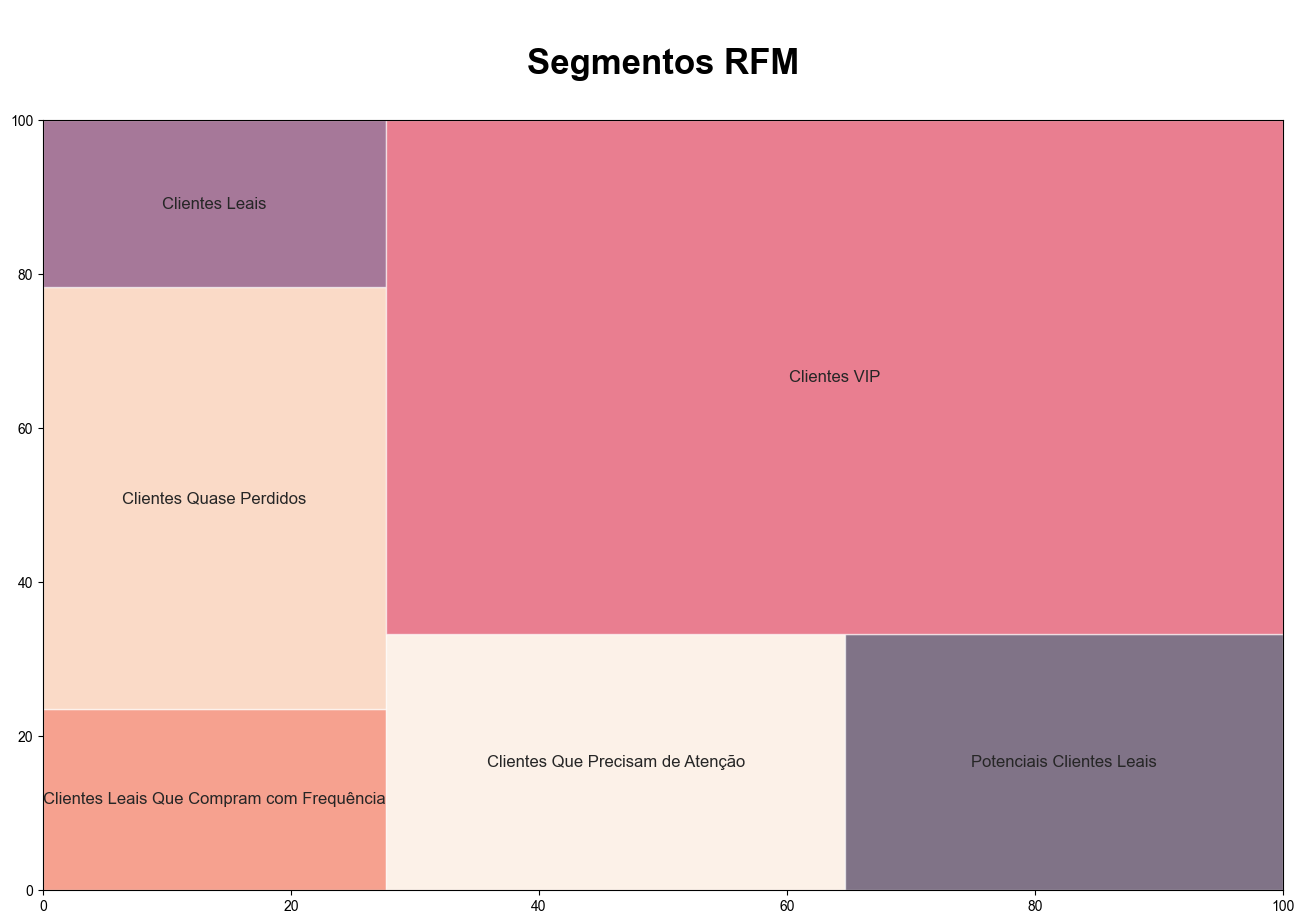

In [71]:
# Plot
rfm_level_agg.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count', 'MarketingAction']
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
sns.set(color_codes = True, style = 'whitegrid')
squarify.plot(sizes = rfm_level_agg['Count'], 
              label = ['Clientes Leais Que Compram com Frequência',
                       'Clientes Quase Perdidos',
                       'Clientes Leais',
                       'Clientes Que Precisam de Atenção',
                       'Potenciais Clientes Leais',
                       'Clientes VIP'], alpha=.6 )

plt.title("\nSegmentos RFM\n", fontsize = 25, fontweight = "bold")
plt.axis('on')
plt.show()

In [72]:
# Agora o dashboard interativo com os segmentos de clientes
fig = go.Figure(go.Treemap(
    labels = rfm_level_ag['Segmento de Cliente'],
    parents = ['Segmento de Cliente', 
               'Segmento de Cliente', 
               'Segmento de Cliente', 
               'Segmento de Cliente', 
               'Segmento de Cliente', 
               'Segmento de Cliente', 
               'Segmento de Cliente'],  
    values = rfm_level_ag[('Monetary', 'count')]))
fig.show()

# Fim